## A.	Algorithmes sur les arbres

Dans ce TP, nous allons implémenter des arbres et es algorithmes vus en cours à l’aide de la programmation orientée objet. 
On considère deux classes :
* Noeud permettant de décrire la structure d'un noeud dans un arbre binaire 
* Arbrebin qui est l'arbre proprement dit. Il se caractérise par
*	sa racine qui est un Noeud 
*	des méthodes pour peupler cet arbre  (et l'afficher sous forme graphique?) 
*	des méthodes que vous allez construire pour mettre le cours en pratique 

### 1.	 Découverte des classes de base


In [10]:
class Noeud():
    """Représente un noeud dans un arbre binaire
    - Propriétés :
        * valeur : valeur du noeud
        * gauche : noeud gauche ou None
        * droit  : noeud droit ou None
    - Méthodes   :
        * est_feuille()
        * __repr__() : affichage d'un noeud"""

    def __repr__(self):
        """la méthode __repr__ définit ce qui sera affiché
        lorsqu'on tapera l'objet dans Jupyter ou un terminal
        Ici, on affiche juste la valeur du noeud"""
        return str(f"## {self.valeur} ##")

    def __init__(self,valeur):
        self.valeur = valeur
        self.gauche = None
        self.droit = None

    def est_feuille(self):
        """Renvoie un booleen selon que le noeud est une feuille"""
        return self.gauche is None and self.droit is None

In [3]:
class Arbrebin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
    
    def __init__(self, nd = None):
        # Initialise l'arbre à vide par défaut, sinon avec un noeud passé en paramètre otionnel
        self.racine = nd
    
    def importe(self, tableau):
        """Importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]]
        [ ] désigne un arbre vide"""
        def importe_tableau(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            if len(tableau) == 1:
                return Noeud(tableau[0])

            # tableau a une longueur >= 2
            nd = Noeud(tableau[0])
            nd.gauche = importe_tableau(tableau[1])
            nd.droit  = importe_tableau(tableau[2]) if len(tableau) > 2 else None
            return nd
        
        self.racine = importe_tableau(tableau)
        
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot

Regardons notre classe en action : Nous allons recréer l'arbre exemple du cours.

In [21]:
# On crée la structure d'arbre à l'aide d'un tableau  ["Noeud", [S_A_G], [S_A_D]]
arbre_liste = ["A",
                ["B", ["C",[],["E"]], 
                      ["D"]],
                ["F", ["G", ["I"]], 
                      ["H",["J", ["K"]]] ],
              ]
 

In [23]:
# On crée une instance vide de notre arbre
arbre = Arbrebin()
# On importe le tableau ci-dessus
arbre.importe(arbre_liste)


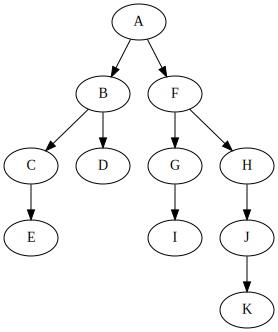

In [14]:
from graphviz import Digraph
# On visualise l'arbre graphiquement
arbre.show()

### Taille et Hauteur d'un arbre

Nous allons compléter la classe arbrebin par les autres méthodes (fonctions) introduites dans le cours. 
- La taille de l'arbre. 
- La hauteur de l'arbre.
Nous avons donné un algorithme récursif en cours se basant sur le principe que la taille d'un arbre est égal à **1 + la taille du Sous Arbre Gauche + la taille du Sous Arbre Droit**. 
Voici une implémentation de cet algorithme dans la classe Arbrebin, elle vous servira de modèle pour les autres méthodes que vous aurez à implémenter dans ce TP.

Vous remarquerez que pour éviter la multiplication des méthodes, nous créons une fonction locale taille_arbre qui n'est visible que dans la méthode taille. C'est cette fonction qui implémente en réalité l'algorithme, la méthode n'étant là que pour invoquer la fonction taille_arbre sur la racine de l'arbre.


    En utilisant le même modèle que pour la taille, vous allez implémenter la méthode hauteur déterminant la hauteur de l'arbre. Vous complèterez donc la cellule ci-dessous.

**Compléter**
- la méthode taille_arbre
- la méthode hauteur_arbre

In [31]:
class Arbrebin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
     
    def __init__(self, nd = None):
        # Initialise l'arbre à vide par défaut, sinon avec un noeud passé en paramètre otionnel
        self.racine = nd
    
    def importe(self, tableau):
        """Importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]]
        [ ] désigne un arbre vide"""
        def importe_tableau(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            if len(tableau) == 1:
                return Noeud(tableau[0])

            # tableau a une longueur >= 2
            nd = Noeud(tableau[0])
            nd.gauche = importe_tableau(tableau[1])
            nd.droit  = importe_tableau(tableau[2]) if len(tableau) > 2 else None
            return nd
        
        self.racine = importe_tableau(tableau)
        
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def taille(self):
        """Renvoie la taille de l'arbre"""
        def taille_arbre(nd):
            # condition d'arrêt
            if nd is None:
                return 0
            # Appel récursif
            return  ... 
        return taille_arbre(self.racine
                            
    def hauteur(self):
        def hauteur_arbre(nd):
            pass
            return ...
        return hauteur_arbre(self.racine)

####  Pour tester votre code 

- On instancie notre arbre
```
arbre = Arbrebin()
arbre.importe(arbre_liste)
```

- On appelle la méthode taille
``` 
arbre.taille()
```
- On appelle la méthode hauteur

In [3]:
arbre = Arbrebin()
arbre.importe(arbre_liste)
print(arbre.taille())
print(arbre.hauteur())

assert arbre.hauteur() == 5
 

### Parcours en profondeur

Voici la méthode permettant le parcours en profondeur préfixe.
-    Ajoutez-la à la classe Arbrebin
-    Vérifiez son bon fonctionnement
-    Implémentez de même les parcours **suffixe**  et **infixe**.
-    Validez votre travail grâce à la cellule de tests.

Vous ferez attention de choisir les mêmes noms de méthodes que dans la cellule de test pour passer ces derniers avec succès.

```
def parcours_prefixe(self):
        """Renvoie la liste des noeuds dans un parcours Prefixe"""
        def prefixe(nd):
            # Condition d'arrêt
            if noeud is None:
                return []
            # Appel récursif et renvoi réponse
            # La valeur est insérée AVANT les appels
            return [nd.valeur] + prefixe(nd.gauche) + prefixe(nd.droit)

        return prefixe(self.racine)
```

In [ ]:
class Arbrebin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
     
    def __init__(self, nd = None):
        # Initialise l'arbre à vide par défaut, sinon avec un noeud passé en paramètre otionnel
        self.racine = nd
    
    def importe(self, tableau):
        """Importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]]
        [ ] désigne un arbre vide"""
        def importe_tableau(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            if len(tableau) == 1:
                return Noeud(tableau[0])

            # tableau a une longueur >= 2
            nd = Noeud(tableau[0])
            nd.gauche = importe_tableau(tableau[1])
            nd.droit  = importe_tableau(tableau[2]) if len(tableau) > 2 else None
            return nd
        
        self.racine = importe_tableau(tableau)
        
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def taille(self):
        """Renvoie la taille de l'arbre"""
        def taille_arbre(nd):
            # condition d'arrêt
            if nd is None:
                return 0
            # Appel récursif
            return  ... 
        return taille_arbre(self.racine
                            
    def hauteur(self):
        def hauteur_arbre(nd):
            pass
            return ...
        return hauteur_arbre(self.racine)

### Pour tster votre code
```
arbre = Arbrebin()
arbre.importe(arbre_liste)

assert arbre.parcours_prefixe() == ['A', 'B', 'C', 'E', 'D', 'F', 'G', 'I', 'H', 'J', 'K']
assert arbre.parcours_suffixe() == ['E', 'C', 'D', 'B', 'I', 'G', 'K', 'J', 'H', 'F', 'A']
assert arbre.parcours_infixe() == ['C', 'E', 'B', 'D', 'A', 'I', 'G', 'F', 'K', 'J', 'H']
```

## Parcours en largeur
Pour finir, ajoutez à la classe **Arbrebin** la méthode `parcours_largeur()`

Vous vérifierez votre travail avec la cellule de tests. 
Il pourra être utile de revoir le cours sur l'implémentation des files FIFO avec une liste python.

In [ ]:
class Arbrebin:
    """Représente un objet arbre binaire
    - Propriétés : 
        * racine : objet de type Noeud désignant la racine de l'arbre
    - Méthodes :
        * show() : représentation graphique de l'arbre à l'aide de graphviz
    """
     
    def __init__(self, nd = None):
        # Initialise l'arbre à vide par défaut, sinon avec un noeud passé en paramètre otionnel
        self.racine = nd
    
    def importe(self, tableau):
        """Importe un arbre depuis un tableau
        ["Noeud", [S_A_G], [S_A_D]]
        [ ] désigne un arbre vide"""
        def importe_tableau(tableau):
            # Cas particuliers
            if tableau == []:
                return None
            if len(tableau) == 1:
                return Noeud(tableau[0])

            # tableau a une longueur >= 2
            nd = Noeud(tableau[0])
            nd.gauche = importe_tableau(tableau[1])
            nd.droit  = importe_tableau(tableau[2]) if len(tableau) > 2 else None
            return nd
        
        self.racine = importe_tableau(tableau)
        
    def show(self):
        """Renvoie un objet graphviz pour la visualisation graphique de l'arbre"""
        def representation(dot, noeud, aretes):
            # Ajoute la représentation du noeud à la représentation dot de l'arbre
            if noeud is not None:
                dot.node(str(id(noeud)), str(noeud.valeur))
                # Appel récursif de la fonction representation
                if noeud.gauche is not None:
                    representation(dot, noeud.gauche, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.gauche))))
                if noeud.droit is not None:
                    representation(dot, noeud.droit, aretes)
                    aretes.append((str(id(noeud)) , str(id(noeud.droit))))
                    
        dot = Digraph(comment="Arbre binaire", format='svg')
        aretes = []
        representation(dot, self.racine, aretes)
        dot.edges(aretes)
        return dot
    
    def taille(self):
        """Renvoie la taille de l'arbre"""
        def taille_arbre(nd):
            # condition d'arrêt
            if nd is None:
                return 0
            # Appel récursif
            return  ... # 
        return taille_arbre(self.racine
                            
    def hauteur(self):
        def hauteur_arbre(nd):
            pass
            return ...
        return hauteur_arbre(self.racine)

### Pour tster votre code
```
arbre = Arbrebin()
arbre.importe(arbre_liste)

assert arbre.parcours_largeur() == ['A', 'B', 'F', 'C', 'D', 'G', 'H', 'E', 'I', 'J', 'K']
``` 

## Arbres Binaires de Recherche 
A suivre

 